# Homework 4

**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Saturday, October 6th, 2018 at 11:59pm

**Instructions:**

- Upload your final answers in the form of a Jupyter notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

### Collaborators

** Place the name of everyone who's submitting this assignment here**

<div class="answer-separator">
------------------------
</div>

In [2]:
import numpy as np
import scipy.stats
import scipy.special

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
%matplotlib inline

## Question 1: Rubber Chickens Bawk Bawk!

In the competitive rubber chicken retail market, the success of a company is built on satisfying the exacting standards of a consumer base with refined and discriminating taste. In particular, customer product reviews are all important. But how should we judge the quality of a product based on customer reviews?

On Amazon, the first customer review statistic displayed for a product is the ***average rating***. The following are the main product pages for two competing rubber chicken products, manufactured by Lotus World and Toysmith respectively:


Lotus World |  Toysmith
- |  - 
![alt](https://am207.github.io/2018fall/homeworks/lotus1.png) |  ![alt](https://am207.github.io/2018fall/homeworks/toysmith1.png)

Clicking on the 'customer review' link on the product pages takes us to a detailed break-down of the reviews. In particular, we can now see the number of times a product is rated a given rating (between 1 and 5 stars).

Lotus World |  Toysmith
- |  - 
![alt](https://am207.github.io/2018fall/homeworks/lotus2.png) |  ![alt](https://am207.github.io/2018fall/homeworks/toysmith2.png)

(The images above are also included on canvas in case you are offline, see below)

In the following, we will ask you to compare these two products using the various rating statistics. **Larger versions of the images are available in the data set accompanying this notebook**.

In [20]:
np.array([.14, 0.08, 0.07,.11,.60])*410

array([ 57.4,  32.8,  28.7,  45.1, 246. ])

Suppose that for each product, we can model the probability of the value each new rating as the following vector:
$$
\theta = [\theta_1, \theta_2, \theta_3, \theta_4, \theta_5]
$$
where $\theta_i$ is the probability that a given customer will give the product $i$ number of stars.


**1.1. Suppose you are told that customer opinions are very polarized in the retail world of rubber chickens, that is, most reviews will be 5 stars or 1 stars (with little middle ground). Choose an appropriate Dirichlet prior for $\theta$. Recall that the Dirichlet pdf is given by:**
$$
f_{\Theta}(\theta) = \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}, \quad B(\alpha) = \frac{\prod_{i=1}^k\Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k\alpha_i\right)},
$$
**where $\theta_i \in (0, 1)$ and $\sum_{i=1}^k \theta_i = 1$, $\alpha_i > 0 $ for $i = 1, \ldots, k$.**

Answer:

I would choose $[\alpha_1, \alpha_2, \alpha_3, \alpha_4, \alpha_5] = [20,1,1,1,20]$

**1.2. Write an expression for the posterior pdf, using a using a multinomial model for observed ratings. Recall that the multinomial pdf is given by:**
$$
f_{\mathbf{X}\vert  \Theta}(\mathbf{x}) = \frac{n!}{x_1! \ldots x_k!} \theta_1^{x_1} \ldots \theta_k^{x_k}
$$
**where $n$ is the total number of trials, $\theta_i$ is the probability of event $i$ and $\sum_i \theta_i = 1$, and $x_i$ is count of outcome $i$ and $\sum_i x_i = n$.** 

  **Note:** The data you will need in order to define the likelihood function should be read off the image files included in the dataset.
  

Answer:

$$
\begin{align}
P(\theta|X) &= \frac{P(X|\theta)P(\theta)}{P(X)} \\
&= \frac{n!}{x_1! \ldots x_k!B(\alpha)P(X)} \prod_{i=1}^k \theta_i^{x_i} \prod_{i=1}^k \theta_i^{\alpha_i - 1} \\
&= \frac{n!}{x_1! \ldots x_k!B(\alpha)P(X)} \prod_{i=1}^k \theta_i^{x_i + \alpha_i - 1} \\
&= \frac{n!}{x_1! \ldots x_k!B(\alpha)P(X)} \prod_{i=1}^k \theta_i^{x_i + \alpha_i - 1} \\
&= \text{Dir}(x_i + \alpha_i)
\end{align} 
$$

Hence, we can easily find the posterior distributions for the two chickens.

**Lotus world:** $[\alpha_1, \alpha_2, \alpha_3, \alpha_4, \alpha_5] = [10+20,   6+1,   10+1,  28+1, 109+20] =[30,  7, 11,  29, 129]$


**Toysmith:** $[\alpha_1, \alpha_2, \alpha_3, \alpha_4, \alpha_5] = [57+20,  33+1,  29+1,  45+1, 246+20] =[77, 34, 30, 46, 266]$


**1.3. Sample 1,000 values of $\theta$ from the *posterior distribution*.**
 

In [21]:
alpha_lotus = [30,  7, 11,  29, 129]
samples_post_lotus = scipy.stats.dirichlet.rvs(alpha_lotus,size = 1000)

alpha_toy = [77, 34, 30, 46, 266]
samples_post_toy = scipy.stats.dirichlet.rvs(alpha_toy,size = 1000)

**1.4. Sample 1,000 values of $x$ from the *posterior predictive distribution*.**

In [22]:
def pred_pos(alpha, n):
    theta = scipy.stats.dirichlet.rvs(alpha)[0]
    return scipy.stats.multinomial.rvs(n,theta)

n_lotus = 162
n_toy = 410

samples_post_pred_lotus = [pred_pos(alpha_lotus, n_lotus) for _ in range(1000)]
samples_post_pred_toy = [pred_pos(alpha_toy, n_toy) for _ in range(1000)]

**1.5. Name at least two major potential problems with using only the average customer ratings to compare products.**

(**Hint:** if product 1 has a higher average rating than product 2, can we conclude that product 1 is better liked? If product 1 and product 2 have the same average rating, can we conclude that they are equally good?)
  

Problem 1: Though one product may have a higher average rating, if the ratings are more polarized, it means that that I might love it or hate it. The other product with a lower average rating may still be a safer bet.

Problem 2: If a product has a high average review, but few reviews in total, it could be that the sample mean is different from the population mean. In other words, the data is not very convincing. Another product with a lower average review, but more ratings overall could lead to more predictably good outcomes overall.

**1.6. Using the samples from your *posterior distribution*, determine which rubber chicken product is superior. Justify your conclusion with sample statistics.**



The only thing I care about is whether my chicken is greater than 4 stars. The statistic I care with respect to the posteriori distribution is $s = \theta_4+\theta_5$. I will choose the chicken with the greater expected value for this sample statistic because $E(s_{\text{lotus}}-s_{\text{toy}}) = E(s_{\text{lotus}}) - E(s_{\text{toy}})$.

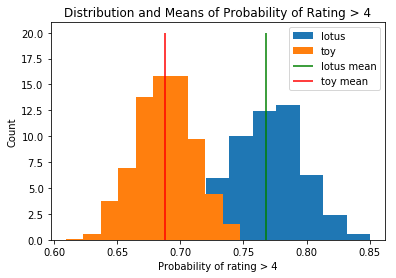

In [24]:
sample_stat_lotus = np.sum(np.array(samples_post_lotus)[:,3:5],axis = 1)
sample_stat_toy = np.sum(np.array(samples_post_toy)[:,3:5],axis = 1)
plt.hist(sample_stat_lotus, label = "lotus",density=True)
plt.hist(sample_stat_toy, label = "toy",density=True)
plt.vlines(np.mean(sample_stat_lotus), ymin=0,ymax =20, color = 'green',label = "lotus mean")
plt.vlines(np.mean(sample_stat_toy),ymin=0,ymax =20 ,color='red',label = "toy mean")
plt.xlabel('Probability of rating > 4')
plt.ylabel('Count')
plt.title('Distribution and Means of Probability of Rating > 4')
plt.legend()
plt.show()

The mean for the lotus probability is greater so I would choose it.

**1.7. Using the samples from your *posterior predictive distribution*, determine which rubber chicken product is superior. Justify your conclusion with sample statistics.**

The only thing I care about is whether my chicken is greater than 4 stars. The statistic I care with respect to the posteriori distribution is $\frac{x_4+x_5}{n}$. I will choose the chicken with the greater expected value for this sample statistic because this is the optimal choice dictated by decision theory.

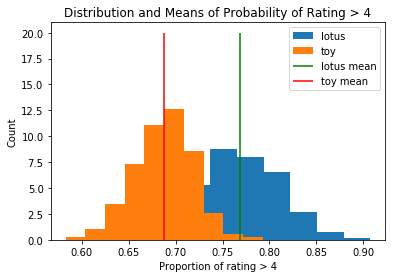

In [25]:
sample_stat_lotus = np.sum(np.array(samples_post_pred_lotus)[:,3:5],axis = 1)/n_lotus
sample_stat_toy = np.sum(np.array(samples_post_pred_toy)[:,3:5],axis = 1)/n_toy
plt.hist(sample_stat_lotus, label = "lotus",density=True)
plt.hist(sample_stat_toy, label = "toy",density=True)
plt.vlines(np.mean(sample_stat_lotus), ymin=0,ymax =20, color = 'green',label = "lotus mean")
plt.vlines(np.mean(sample_stat_toy),ymin=0,ymax =20 ,color='red',label = "toy mean")
plt.xlabel('Proportion of rating > 4')
plt.ylabel('Count')
plt.title('Distribution and Means of Probability of Rating > 4')
plt.legend()
plt.show()

The mean for the lotus chicken is greater so I would choose it.

**1.8. Finally, which rubber chicken product is superior?**

  (**Note:** we're not looking for "the correct answer" here, any sound decision based on a statistically correct interpretation of your model will be fine)

The means for the lotus chicken in terms of the posterior and posterior predictive distributions are greater, so I would choose it.

## Question 2: He Who is Not Courageous Enough to Take Risks Will Accomplish Nothing In Life

**No Coding required**

Consider a setting where the feature and label space are $\mathcal{X} = \mathcal{Y} = [0, 1]$.    In this exercise we will consider both the square loss and the absolute loss, namely:

$$ \mathbb{l}_{sq}(y_1, y_2) = (y_1 - y_2)^2 $$
$$ \mathbb{l}_{abs}(y_1, y_2) = \left \vert y_1 - y_2 \right \vert $$


Let (X, Y) be random, with the following with joint probability density $p_{XY}(x, y) = 2y$, where $x, y \ \in \  [0, 1]$.  We define **statistical risk** as follows:

**Definition (Statistical Risk)** For a prediction rule $f$ and a joint distribution of features and labels $P_{XY}$ the statistical risk $\mathcal{R}(f)$ of $f$ is defined as 

$$\mathcal{R}(f) \equiv \mathbb{E}_{XY}\left[\mathbb{l}(f(X),Y)\ \vert \ f \right]$$,

where $(X, Y) \sim P_{XY}$.  The conditional statement ensures the definition is sensible even if $f$ is a random quantity.

**2.1. Show that in this case $X$ and $Y$ are independent, meaning the feature $X$ carries no information about Y.**

$$
\begin{align}
P(X) &= \int_0^1 2y dy \\
&= 1
\end{align}
$$

and

$$
\begin{align}
P(y) &= \int_0^1 2y dx \\
&= 2y
\end{align}
$$

Hence, 

$$
P(X,Y)=P(X)P(Y)
$$

**2.2. What is the risk of prediction rule $f(x) = \frac{1}{2}$ according to the two loss functions?**

First consider the squared loss error:

$$
\begin{align}
\mathbb{E}_{XY} \left[\mathbb{l}_{sq}(f(X),Y)\ \vert \ f \right] &= \int \int \mathbb{l}_{sq}(1/2,y) 2y dxdy \\
&= \int \int (1/2-y)^2 2y dxdy \\
&= \int  2(1/4-y+y^2)y dy \\
&= \int  1/2y-2y^2+2y^3 dy \\
&= 1/4-2/3+2/4  \\
&= 1/4-2/3+2/4  \\
&= 1/12  \\
\end{align}
$$

Now consider the absolute error:

$$
\begin{align}
\mathbb{E}_{XY} \left[\mathbb{l}_{abs}(f(X),Y)\ \vert \ f \right] &= \int \int \mathbb{l}_{abs}(1/2,y) 2y dxdy \\
&= \int \int 2|1/2-y| y dxdy \\
&= \int 2|1/2-y| y dy \\
&= \int_0^{1/2} 2(1/2-y) y dy - \int_{1/2}^1 2(1/2-y) y dy \\
&= \int_0^{1/2} y-2y^2 dy - \int_{1/2}^1 y-2y^2 dy \\
&= 1/24 +5/24 \\
&= 1/4 \\
\end{align}
$$

**2.3. What is the risk of the prediction rule $f^*(x) = \frac{1}{\sqrt{2}}$ according to the two loss functions?**

**Hint (for 2.3):**

* In general the Bayes predictor according to the absolute value loss is the median of the conditional distribution of $Y$ given $X = x$.

$$
\begin{align}
\mathbb{E}_{XY} \left[\mathbb{l}_{sq}(f(X),Y)\ \vert \ f \right] &= \int \int \mathbb{l}_{sq}(1/\sqrt{2},y) 2y dxdy \\
&= \int \int (1/\sqrt{2}-y)^2 2y dxdy \\
&= 1-2\sqrt{2}/3
\end{align}
$$

Now consider the absolute error:

$$
\begin{align}
\mathbb{E}_{XY} \left[\mathbb{l}_{abs}(f(X),Y)\ \vert \ f \right] &= \int \int \mathbb{l}_{abs}(1/\sqrt{2},y) 2y dxdy \\
&= \int \int |1/\sqrt{2}-y| 2y dxdy \\
&= \int_0^{1/\sqrt{2}} (1/\sqrt{2}-y)2y dy - \int_{1/\sqrt{2}}^1 (1/\sqrt{2}-y)2y dy \\
&=\frac{1}{6\sqrt{2}} - \frac{-8 + 5\sqrt{2}}{12} \\
&=\frac{2-\sqrt{2}}{3}
\end{align}
$$

**2.4. Show that $f^*$ has actually the smallest absolute loss risk among all prediction rules.**

we need to find $m$ such that $\int \int |m-y| 2y dxdy = \int |m-y| 2y dy$ is minimal.

We can find a closed form solution for the intergral,

$$
\begin{align}
\int |m-y| 2y dy &= \int_0^m (m-y)2y dy - \int_m^1 (m-y)2y dy\\
&= \left(m y^2 - \frac{2 y^3}{3}\right) \biggr\rvert_0^m - \left(m y^2 - \frac{2 y^3}{3}\right) \biggr\rvert_m^1\\
&= 2\left(\frac{m^3}{3}\right) - \left(m-\frac{2}{3}\right)\\
&= \frac{2m^3}{3} - m+\frac{2}{3}\\
\end{align}
$$

Now we can differentiate this closed form solution and set to 0 to find the minimal m.
$$
\begin{align}
\frac{d}{dm}\left(\frac{2m^3}{3} - m+\frac{2}{3}\right) &= 2m^2 - 1 \\
\end{align}
$$

Setting this function equal to 0, we find $m^* = 1/\sqrt{2}$




## Question 3: Maxwell's Demon Has a Wonderful Way of showing us What Really Matters

**Some Coding required**

**3.1. Find the entropy of the exponential probability density on support (0, $\infty$) with mean $1/\lambda$.**

The exponential probability distribution has pdf

$$
\begin{align}
f(x) = \lambda e^{-\lambda x} && \text{for } x \geq 0
\end{align}
$$

The entropy is 

$$
\begin{align}
H(f) &= -\int_0^\infty f(x)\log(f(x))dx \\
&= -\int_0^\infty \lambda e^{-\lambda x}\log(\lambda e^{-\lambda x})dx \\
&= -\int_0^\infty  \lambda e^{-\lambda x}\left(\log(\lambda) -\lambda x\right)dx \\
&= -\int_0^\infty  \lambda\log(\lambda)e^{-\lambda x} - \lambda^2xe^{-\lambda x} dx \\
&= -\left[ e^{-\lambda x} \left(\lambda x - \log(\lambda)+1\right)  \right]\biggr\rvert_0^\infty \\
&= 1-\log(\lambda)\\
\end{align}
$$

**3.2. Show that the exponential distribution $p^*$ is the maximum entropy distribution on support (0, $\infty$)  with specified mean $\lambda$. That is to say prove that for any continuous probability density function $p(x)$ on (0, $\infty$) with mean $\lambda$ then the entropy h(p) <= h($p^*$) with equality if and only if p is also the exponential with mean $\lambda$**

This proof is based on https://math.stackexchange.com/questions/603042/maximum-entropy-the-existence-of-a-calculus-of-variations-problem

Let $p^*$ be the exponential distribution with mean $1/\lambda$ and let $q$ be an arbitrary continuous distribution on $(0,\infty)$ with mean $1/\lambda$.

The KL divergence of the two distribution can be written as

$$
0 \leq \text{D}(q,p^*) = -H(q) - \int q \log(p^*)
$$

where $H(q)$ is the entropy of $q$.

Plugging in the exponential distribution pdf to the second integral gives

$$
\begin{align}
\int q \log(p^*) &= \int q(x) \log(\lambda e^{-\lambda x}) dx \\
&= \int q(x) (\log(\lambda) -\lambda x) dx \\
&= \log(\lambda)\int q(x)  - \lambda \int xq(x) dx \\
&= \log(\lambda)\int q(x)  - \lambda \text{E}(q) dx \\
&= \log(\lambda)  - 1 \\
\end{align}
$$

We can plug this into the KL Divergence

$$
\begin{align}
\text{D}(q,p^*) &= -H(q) - \log(\lambda)  + 1 \\
&= -H(q) + H(p^*) 
\end{align}
$$

Since the KL divergence must be positive

$$
H(q) \leq  H(p^*)
$$

We're familiar with the CLT as a way of approximating the sum of IID random variables with an appropriate Normal distribution.  Let's investigate this relationship by using the KL-Divergence.  Given n identically distributed Bernoulli variables $Y_i \sim Bern(p)$, then their sum approaches a Normal distribution.

3.3. Visualize this relationship by drawing n = 10,000 samples from a Bernoulli with p = 0.02.  These samples determine a random variable and thus a probability distribution (which in the last homework we called the empirical distribution of the data).  Visualize this probability distribution by plotting a normed histogram of the samples.  On your plot overlay the appropriately fitted Gaussian distribution.  Make sure to appropriately title and label your plot.

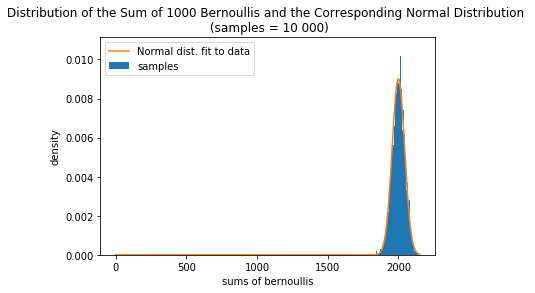

In [66]:
# plot histogram
n = 100000
p = 0.02
q = 1-p
bern_samples = np.random.binomial(n=1,p=p,size=(10000,n))
bern_sum_samples = np.sum(bern_samples, axis=1)

plt.hist(bern_sum_samples, density = True, label = 'samples', bins=range(np.max(bern_sum_samples)))

# plot normal distribution
x = np.linspace(0, np.max(bern_sum_samples), 1000)
plt.plot(x, scipy.stats.norm.pdf(x, loc = n*p, scale= np.sqrt(n*p*q)), label = 'Normal dist. fit to data')

# format plot
plt.xlabel('sums of bernoullis')
plt.ylabel('density')
plt.title('Distribution of the Sum of 1000 Bernoullis and the Corresponding Normal Distribution \n (samples = 10 000)')
plt.legend()
plt.show()

**3.4. From visual inspection are the two distributions close to each other?**

Yes, they look close enough to each other.

**3.5. Formalize your answer to 3.3 and 3.4 by writing a program to compute the K-L divergence between the two distributions (the sum of 10000 sampled Bernoullis and the appropriate Gaussian).  What is the value of the KL divergence.**

In [67]:
freq = np.bincount(bern_sum_samples)
prob_sample = freq/np.sum(freq)
prob_sample

array([0.    , 0.    , 0.    , ..., 0.0002, 0.    , 0.0001])

In [68]:
mean = n*p
std = np.sqrt(n*p*q)
pdf = lambda x: scipy.stats.norm.cdf(x+.5, loc = mean, scale= std)- scipy.stats.norm.cdf(x-.5, loc = mean, scale= std)
normal_prob = pdf(np.arange((len(prob_sample))))
normal_prob

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       2.89812478e-05, 2.68392816e-05, 2.48429476e-05])

In [69]:
non_zero_indices = np.nonzero(prob_sample)
prob_sample = prob_sample[non_zero_indices]
normal_prob = normal_prob[non_zero_indices]
KL = np.sum(prob_sample*np.log(prob_sample/normal_prob))
print("The KL divergence is ", KL)

The KL divergence is  0.014474052083132877


**3.6. Let's visualize the convergence of the sum of bernoulli RVs to a Gaussian as fortold by the CLT by repeating the process from 3.5 for various values of n.  We'll set our selection of sample sizes to the following: [100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000, 50000, 100000].  Setting n to each of the specified sample sizes repeat the following procedure 10 times:**

* Draw n bernoulli samples using the Bernoulli parameter from 3.3 (p=0.02).
* Calculate the Kullback-Leibler divergence between the random variable defined by the sum of Bernoullis samples and the appropriately fitted gaussian. 

**For each sample size you should have 10 KL divergences. Construct a log scale (in both axes) plot of the Kullback-Leibler divergence and and the 3-$\sigma$ envelope against the sample size.  What can you convergence of the distributions in question?  What does this mean for the CLT?**

In [70]:
def KL_normal(n):
    # take samples
    bern_samples = np.random.binomial(n=1,p=0.02,size=(n,1000))
    bern_sum_samples = np.sum(bern_samples, axis=1)
    
    # calculate empirical dist.
    freq = np.bincount(bern_sum_samples)
    prob_sample = freq/np.sum(freq)
    
    # calculate pdf normal values
    mean = 1000*0.02
    std = np.sqrt(1000*0.02*(1-0.02))
    pdf = lambda x: scipy.stats.norm.cdf(x+.5, loc = mean, scale= std)- scipy.stats.norm.cdf(x-.5, loc = mean, scale= std)
    normal_prob = pdf(np.arange((len(prob_sample))))

    # calculate KL divergence
    non_zero_indices = np.nonzero(prob_sample)
    prob_sample = prob_sample[non_zero_indices]
    normal_prob = normal_prob[non_zero_indices]
    return np.sum(prob_sample*np.log(prob_sample/normal_prob))

In [71]:
def KL_ten_times(n):
    return [KL_normal(n) for _ in range(10)]

samples = [100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000, 50000, 100000]
KLs = [KL_ten_times(s) for s in samples]

In [72]:
KLs

[[0.15004854986472008,
  0.17941587765168446,
  0.20286741442753523,
  0.18096580885633987,
  0.09212351206740718,
  0.20913337157233416,
  0.15152284438542332,
  0.12719901389631338,
  0.14237120647447873,
  0.12042817932822122],
 [0.04130352413512764,
  0.0710559127699489,
  0.07694132909008589,
  0.07776605390955002,
  0.0721937842466778,
  0.06155854773746064,
  0.05388957619319909,
  0.05229244580248287,
  0.06748140009918835,
  0.052647322816864336],
 [0.03572645390333839,
  0.05289915789001925,
  0.049529072548750566,
  0.021598194179592946,
  0.0462698129517273,
  0.024801675401710806,
  0.022468275795687942,
  0.03490498392036316,
  0.030637863332677696,
  0.03867449977383183],
 [0.027405556705237217,
  0.01616520817228298,
  0.03799327305488784,
  0.02425788442147584,
  0.025254766782168928,
  0.03183988919352658,
  0.018393599801265058,
  0.022833029990508714,
  0.041627758508634705,
  0.030817284695620124],
 [0.019900632227037814,
  0.014250160780130238,
  0.018638579110763

In [73]:
mean_log_KL = np.array([np.log(np.mean(KL_sample_size)) for KL_sample_size in KLs])

In [74]:
log_KL_plus = np.array([np.log(np.mean(KL_sample_size)+3*np.std(KL_sample_size)) for KL_sample_size in KLs])
log_KL_minus = np.array([np.log(np.mean(KL_sample_size)-3*np.std(KL_sample_size)) for KL_sample_size in KLs])

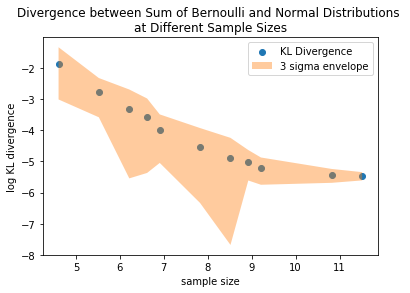

In [75]:
plt.scatter(np.log(samples),mean_log_KL,label = 'KL Divergence')
plt.fill_between(np.log(samples), y1 = log_KL_minus,y2 = log_KL_plus, alpha = 0.4,label = '3 sigma envelope')
plt.xlabel('sample size')
plt.ylabel('log KL divergence')
plt.title('Divergence between Sum of Bernoulli and Normal Distributions \nat Different Sample Sizes')
plt.legend()

# Q4: Marvel at the DC Flash Light Speed experiment

Simon Newcomb did an experiment in 1882 to measure the speed of light. These are the times required for light to travel 7442 metres. These are recorded as deviations from 24,800 nanoseconds.

This data is in the following dataset $D$.

In [76]:
light_speed = np.array([28, 26, 33, 24, 34, -44, 27, 16, 40, -2, 29, 22, 24, 21, 25,
                        30, 23, 29, 31, 19, 24, 20, 36, 32, 36, 28, 25, 21, 28, 29,
                        37, 25, 28, 26, 30, 32, 36, 26, 30, 22, 36, 23, 27, 27, 28,
                        27, 31, 27, 26, 33, 26, 32, 32, 24, 39, 28, 24, 25, 32, 25,
                        29, 27, 28, 29, 16, 23])

**4.1. Plot a histogram of the data. Are there outliers in the data?  What data points might you consider to be outliers?**

Text(0.5,1,'Light Speed Measurement Distribution')

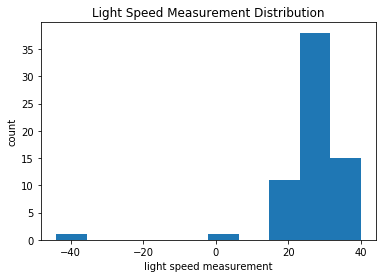

In [77]:
plt.hist(light_speed)
plt.xlabel('light speed measurement')
plt.ylabel('count')
plt.title('Light Speed Measurement Distribution')

**4.2. We use a normal models with weakly informative priors to model this experiment. In particular assume uniform priors for both $\mu$ and $\sigma$:**

$$\mu \sim Uniform(0, 60)$$

$$\sigma \sim Uniform(0.1, 50)$$

**Write down an expression for the posterior (joint) pdf $p(\mu, \sigma \vert D)$.**

The prior distribution is 
$$
\begin{align}
p(\mu, \sigma) = \frac{1}{60}\frac{1}{49.9} && \text{for } \mu \in (0, 60) \text{ and } 
\sigma \in (0.1, 50)
\end{align}
$$

The likelihood function is 

$$
p(D \vert \mu, \sigma) = \prod_i \frac{1}{\sigma \sqrt {2\pi }}e^{ - \left( {x_i - \mu } \right)^2 / 2\sigma^2}
$$

and
$$
\begin{align}
P(D) &= \int \int p(D \vert \mu, \sigma)P(\mu, \sigma) d\mu d\sigma \\
&= P(\mu, \sigma) \int \int p(D \vert \mu, \sigma) d\mu d\sigma \\
\end{align}
$$

The posterior pdf is

$$
\begin{align}
P(\mu, \sigma \vert D) &= \frac{p(D \vert \mu, \sigma)P(\mu, \sigma)}{P(D)} \\
&=\frac{p(D \vert \mu, \sigma)}{\int \int p(D \vert \mu, \sigma) d\mu d\sigma}
\end{align}
$$

**4.3. Set up a 500 point grid in both the $\mu$ space and the $\sigma$ space. Compute the normalized posterior on this grid and make a contour plot of it.**

**Hint: `np.meshgrid` is your friend**

In [78]:
likelihood = lambda mu, sigma: np.prod([scipy.stats.norm.pdf(l, mu, sigma) for l in light_speed], axis = 0)

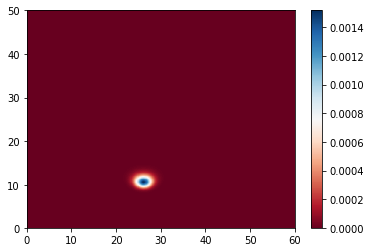

In [79]:
mu = np.linspace(0,60,500)
sigma = np.linspace(0.1,50,500)
mu_grid, sigma_grid = np.meshgrid(mu, sigma)

posterior_unnormalized = np.array(likelihood(mu_grid, sigma_grid))
posterior = posterior_unnormalized/np.sum(posterior_unnormalized)
fig, ax = plt.subplots()
p = ax.pcolor(mu, sigma, posterior, cmap=cm.RdBu)
cb = fig.colorbar(p, ax=ax)

**4.4. Use this normalized posterior to sample from the grid, posterior samples of size 500000. That is the posterior should be of shape `(500000, 2)`. (Hint: one way to do it is to first flatten the meshgrid into a grid of shape (250000, 2). Flatten the posterior probabilities as well into a size 250000 vector. Then sample 500000 indices and use them to index the grid). Plot the $\mu$ and $\sigma$ marginal posteriors.**

In [102]:
mu_sigma_pairs = np.array(list(zip(np.ravel(mu_grid),np.ravel(sigma_grid))))
probs = np.ravel(posterior)
idx = np.random.choice(range(250000), size=500000, p = probs)
mu_sigma_samples = mu_sigma_pairs[idx,:]

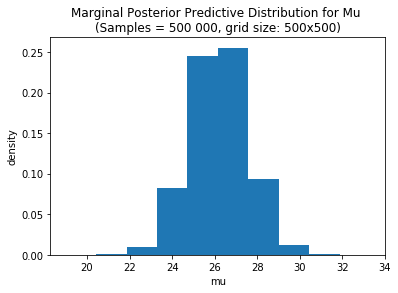

In [103]:
plt.hist(mu_sigma_samples[:,0], density = True)
plt.xlabel('mu')
plt.ylabel('density')
plt.title('Marginal Posterior Predictive Distribution for Mu \n(Samples = 500 000, grid size: 500x500)')
plt.show()

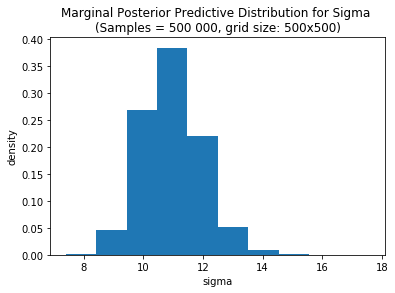

In [104]:
plt.hist(mu_sigma_samples[:,1], density = True)
plt.xlabel('sigma')
plt.ylabel('density')
plt.title('Marginal Posterior Predictive Distribution for Sigma \n(Samples = 500 000, grid size: 500x500)')
plt.show()

**4.5. Experiment with reducing the grid size down to 100x100. How do the marginal posteriors now look? What does this look tell us about the dimensional scaling of this grid-sampling-in-proportion-to-posterior method of obtaining samples?**

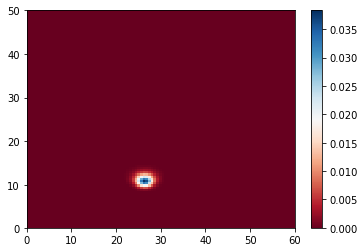

In [105]:
mu = np.linspace(0,60,100)
sigma = np.linspace(0.1,50,100)
mu_grid, sigma_grid = np.meshgrid(mu, sigma)

posterior_unnormalized = np.array(likelihood(mu_grid, sigma_grid))
posterior = posterior_unnormalized/np.sum(posterior_unnormalized)
fig, ax = plt.subplots()
p = ax.pcolor(mu, sigma, posterior, cmap=cm.RdBu)
cb = fig.colorbar(p, ax=ax)

In [106]:
mu_sigma_pairs = np.array(list(zip(np.ravel(mu_grid),np.ravel(sigma_grid))))
probs = np.ravel(posterior)
idx = np.random.choice(range(10000), size=500000, p = probs)
mu_sigma_samples = mu_sigma_pairs[idx,:]

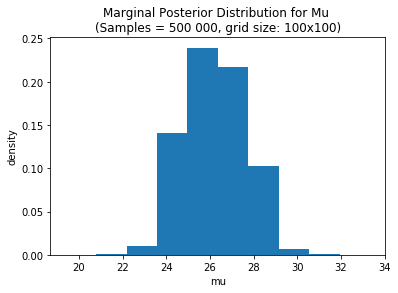

In [107]:
plt.hist(mu_sigma_samples[:,0], density = True)
plt.xlabel('mu')
plt.ylabel('density')
plt.title('Marginal Posterior Distribution for Mu \n(Samples = 500 000, grid size: 100x100)')
plt.show()

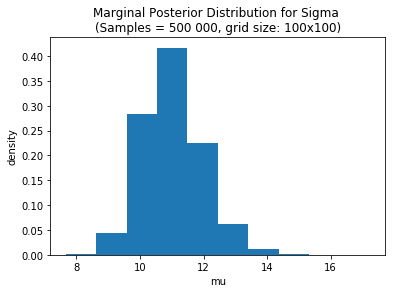

In [108]:
plt.hist(mu_sigma_samples[:,1], density = True)
plt.xlabel('mu')
plt.ylabel('density')
plt.title('Marginal Posterior Distribution for Sigma \n(Samples = 500 000, grid size: 100x100)')
plt.show()

**4.6. Now draw from the data sampling normal distribution to obtain the posterior-predictive distribution. You will have as many samples as the size of the posterior. Plot the posterior predictive distribution against the data, and write down your observations.**

In [109]:
mu = np.linspace(0,60,500)
sigma = np.linspace(0.1,50,500)
mu_grid, sigma_grid = np.meshgrid(mu, sigma)

posterior_unnormalized = np.array(likelihood(mu_grid, sigma_grid))
posterior = posterior_unnormalized/np.sum(posterior_unnormalized)

In [110]:
mu_sigma_pairs = np.array(list(zip(np.ravel(mu_grid),np.ravel(sigma_grid))))
probs = np.ravel(posterior)
idx = np.random.choice(range(250000), size=500000, p = probs)
mu_sigma_samples = mu_sigma_pairs[idx,:]

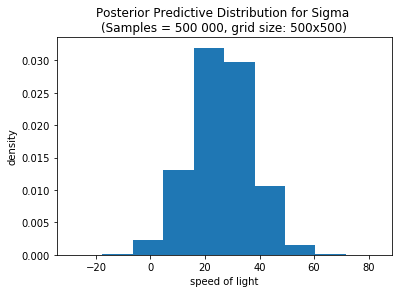

In [111]:
post_pred = np.random.normal(loc = mu_sigma_samples[:,0],scale = mu_sigma_samples[:,1])
plt.hist(post_pred, density = True)
plt.xlabel('speed of light')
plt.ylabel('density')
plt.title('Posterior Predictive Distribution for Sigma \n(Samples = 500 000, grid size: 500x500)')
plt.show()

4.7. **Informally using a test-statistic**

We might wish to compute a test statistic from the posterior predictive. Say for example, we wish to talk about the minimum value of the posterior predictive.

The way to do this is to replicate the posterior predictive multiple times. We replicate the posterior-predictive (that is, do the sampling you did in 4.6) 66 times, which is the size of our dataset. In other words, we create as-many artificial datasets as there are samples in our posterior.

This is called a **replicative posterior predictive**.

Compute the replicative distribution of the minimum-value of the dataset and compare it to the actual value. What might you conclude about the quality of the specification of our model for the purposes of computing minimum values?

In [112]:
rep_post_pred = [np.random.normal(size = 500000, loc = mu_sigma_samples[:,0],scale = mu_sigma_samples[:,1]) 
                 for _ in range(66)]
np.column_stack(rep_post_pred).shape

(500000, 66)

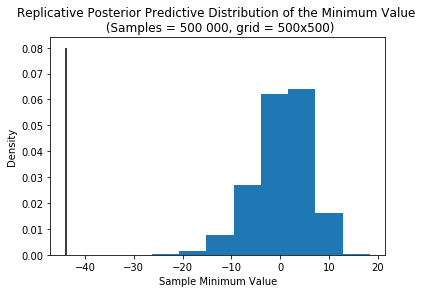

In [116]:
plt.hist(np.min(rep_post_pred, axis = 0), density = True)
plt.xlabel('Sample Minimum Value')
plt.ylabel('Density')
plt.vlines(-44, ymin = 0, ymax = .08)
plt.title('Replicative Posterior Predictive Distribution of the Minimum Value \n (Samples = 500 000, grid = 500x500)')
plt.show()

It is difficult to tell if this model is well specified or not. If we assume that our outlier is an anomoly, then our model is well specified because it correctly identified the anomoly. However, if we wanted our model to fit to this outlier, then our model is mispecified and we should have chosen a prior with fatter tails. It depends on whether we trust our priors or our data more.